## 데이터분석 - 기온데이터
- notepad++ 설치 => euc-kr -> utf-8 로 인코딩 해줌
- id : 545 201 5229, pw : 905980

In [2]:
# 파일 위치 확인 (%pwd)
%pwd

'c:\\Users\\User\\Desktop\\python_exer\\220714'

In [3]:
%ls

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: 465C-4E72

 c:\Users\User\Desktop\python_exer\220714 ���͸�

2022-07-14  ���� 10:15    <DIR>          .
2022-07-14  ���� 10:15    <DIR>          ..
2022-07-14  ���� 01:04            12,984 ex_re.ipynb
2022-07-14  ���� 11:29         2,353,565 re_temperature.ipynb
               2�� ����           2,366,549 ����Ʈ
               2�� ���͸�  175,926,800,384 ����Ʈ ����


In [4]:
# csv.reader(csvfile, delimiter), csv.writer(csvfile, delimiter)
# 순서; 파일 open, csv reader 객체 생성 및 파일 읽어오기, data 출력, 파일 close
import csv
PATH = '../DATA_WOO/'
f = open(PATH+'daegu.csv', 'r', encoding='euc_kr')
data = csv.reader(f, delimiter=',')
print(data)
f.close()


In [5]:
f = open(PATH+'daegu.csv', 'r', encoding='euc_kr')
data = csv.reader(f, delimiter=',')
for row in data:
    print(row)   # 리스트 형태로 출력
f.close()


['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
['1907-01-31', '143', '', '-7', '0.8']
['1907-02-01', '143', '', '', '']
['1907-02-02', '143', '', '', '']
['1907-02-03', '143', '', '', '']
['1907-02-04', '143', '', '', '']
['1907-02-05', '143', '', '', '']
['1907-02-06', '143', '', '', '']
['1907-02-07', '143', '', '', '']
['1907-02-08', '143', '', '', '']
['1907-02-09', '143', '', '', '']
['1907-02-10', '143', '', '-3', '4.8']
['1907-02-11', '143', '', '', '']
['1907-02-12', '143', '', '', '']
['1907-02-13', '143', '', '', '']
['1907-02-14', '143', '', '', '']
['1907-02-15', '143', '', '', '']
['1907-02-16', '143', '', '', '']
['1907-02-17', '143', '', '', '']
['1907-02-18', '143', '', '', '']
['1907-02-19', '143', '', '', '']
['1907-02-20', '143', '', '-3.4', '7.6']
['1907-02-21', '143', '', '', '']
['1907-02-22', '143', '', '', '']
['1907-02-23', '143', '', '', '']
['1907-02-24', '143', '', '', '']
['1907-02-25', '143', '', '', '']
['1907-02-26', '143', '', '', '']
['1907-02-27', '143

#### 데이터 헤더 저장

In [6]:
#데이터 헤더:  데이터파일에서 여러가지 값들이 어떤 의미를 갖는지 표시한 행
#헤더 저장: next()사용
#날짜 , 최고/최저 기온
f = open(PATH+'daegu.csv', 'r', encoding='euc_kr')
data = csv.reader(f)
header = next(data)
print(header)
f.close()

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']


# 대구가 가장 더웠던 날은?
- 대구 기온이 가장 높았던 날의 날짜와 기온 구하기
    - csv 데이터를 읽어옴
    - 순차적으로 최고 기온을 확인 (비교) -> 최대값
    - 최고 기온이 가장 높았던 날짜의 데이터를 저장
    - 문자열 형태의 데이터를 실수 형태로 변환
    - 지금까지의 최고기온 값보다 현재 행의 최고기온이 더 높으면 업데이트

In [7]:
f = open(PATH+'daegu.csv', 'r', encoding='euc_kr')
data = csv.reader(f)

header = next(data)
max_temp = -999
max_date = ''
min_temp = 999
min_date = ''

for row in data:
    # 문자열 비교
    if row[-1] == '':
        row[-1] = -999
    row[-1] = float(row[-1])

    if row[-2] == '':
        row[-2] = 999
    row[-2] = float(row[-2])

    # 최대값 비교 및 업데이트
    if max_temp < row[-1]:
        max_temp = row[-1]
        max_date = row[0]

    # 최소값 비교 및 업데이트
    if min_temp > row[-2]:
        min_temp = row[-2]
        min_date = row[0]


f.close()    
print(f'기상관측 최고온도: {max_temp}, 날짜: {max_date}') 
print(f'기상관측 최저온도: {min_temp}, 날짜: {min_date}') 

기상관측 최고온도: 40.0, 날짜: 1942-08-01
기상관측 최저온도: -20.2, 날짜: 1923-01-19


#### numpy를 활용한 최고기온 구하기
- np.max(), np.min()
- np.argmax()
- np.argmin()

In [8]:
import numpy as np
import pandas as pd
f = open(PATH+'daegu.csv', 'r', encoding='euc_kr')
data = csv.reader(f)

header = next(data)
# 기온,날짜를 받을 리스트 생성
max_temp_list = []
max_date_list = []

for row in data:
    # 문자열 비교
    if row[-1] == '':
        row[-1] = -999  # 최고기온을 찾아야하므로 가장 작은 값을 입력
    max_temp_list.append(row[-1])  
    max_date_list.append(row[0])
f.close()

# 파이썬의 리스트를 numpy의 ndarray로 변환
max_temp_array = np.array(max_temp_list)
max_date_array = np.array(max_date_list)
# 문자열 실수로 변환
max_temp_array = max_temp_array.astype(float)

max_temp = max_temp_array.max()
index = max_temp_array.argmax()
max_date = max_date_array[index]

print(f'기상관측 최고온도: {max_temp}, 날짜: {max_date}') 

기상관측 최고온도: 40.0, 날짜: 1942-08-01


In [9]:
# 판다스를 이용해 최고기온 구하기
df = pd.read_csv(PATH+'daegu.csv', encoding= 'euc_kr')
max_date_index = df['최고기온(℃)'].idxmax()
max_temp = df['최고기온(℃)'].max()
max_date = df.loc[max_date_index,'날짜']
print(f'기상관측 최고온도: {max_temp}, 날짜: {max_date}') 

기상관측 최고온도: 40.0, 날짜: 1942-08-01


In [10]:
import matplotlib.pyplot as plt

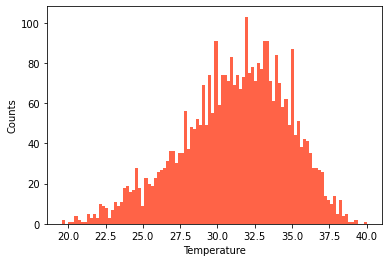

In [11]:
f = open(PATH+'daegu.csv', 'r', encoding='euc_kr')
data = csv.reader(f)

header = next(data)
aug = []

for row in data:
    month = row[0].split('-')[1]
    if row[-1] != '':
        if month == '08':
            aug.append(float(row[-1]))

f.close()

plt.hist(aug, bins=100, color='tomato')
plt.xlabel('Temperature')
plt.ylabel('Counts')

plt.show()

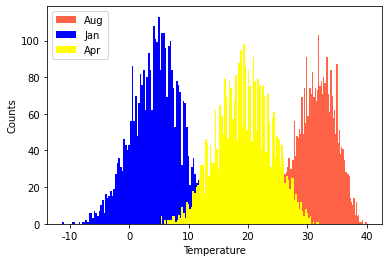

In [23]:
f = open(PATH+'daegu.csv', 'r', encoding='euc_kr')
data = csv.reader(f)

header = next(data)
aug = []
jan = []
apr = []

for row in data:
    month = row[0].split('-')[1]
    if row[-1] != '':
        if month == '08':
            aug.append(float(row[-1]))
        if month == '01':
            jan.append(float(row[-1]))
        if month == '04':
            apr.append(float(row[-1]))
            
f.close()
plt.hist(aug, bins=100, color='tomato', label= 'Aug')
plt.hist(jan, bins=100, color='b', label= 'Jan')
plt.hist(apr, bins=100, color='yellow', label= 'Apr')
plt.xlabel('Temperature')
plt.ylabel('Counts')
plt.rc('axes', unicode_minus = False)  # 한글 폰트쓸때, 마이너스 값이 깨지는 현상 방지


plt.legend()
plt.show()



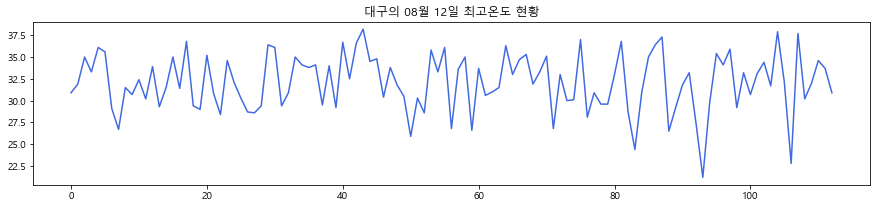

In [32]:
import matplotlib.font_manager as fm
# 특정 날짜의 최고 기온 찾기    
def month_day(month,date):
    f = open(PATH+'daegu.csv', 'r', encoding='euc_kr')
    data = csv.reader(f)
    header = next(data)
    result = []
    for row in data:
        if row[-1] != '':
            date_string = row[0].split('-')
            if date_string[1] == month and date_string[2] == date:
                result.append(float(row[-1]))
    f.close()
    plt.figure(figsize=(15,3))
    plt.rc('font', family= 'Malgun Gothic')
    plt.plot(result,'royalblue')
    plt.title(f'대구의 {month}월 {date}일 최고온도 현황')
    plt.show()
    

month, date = input('월과 일을 입력하세요: ').split()

month_day(month, date)

#### 운영체제 플랫폼 구별 및 한글 폰트 설정
- platform.system() 함수 사용
- Windows: 'Windows'
- Mac: 'Darwin'
- Linux: 'Linux'

In [33]:
# 운영체제 플랫폼 구별 및 한글 폰트 설정
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

system_name = platform.system()
if system_name == 'Windows':
    print('Windows OS')
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    print('Mac OS')
    plt.rc('font', family= 'AppleGothic')
elif system_name == 'Linux':
    print('Linux OS')
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print('Not Support')

Windows OS


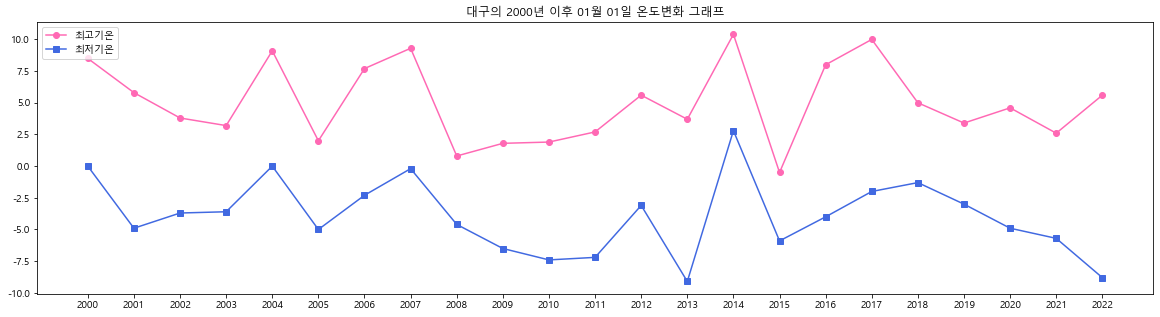

In [39]:
import matplotlib.font_manager as fm
# 2000년 이후 특정 날짜의 최고 기온 찾기    
def month_day(year, month, date):
    f = open(PATH+'daegu.csv', 'r', encoding='euc_kr')
    data = csv.reader(f)
    header = next(data)
    high_temp = []
    low_temp = []
    x_year = []

    for row in data:
        if row[-1] != '':
            date_string = row[0].split('-')
            if int(date_string[0]) >= int(year):
                if date_string[1] == month and date_string[2] == date:
                    high_temp.append(float(row[-1]))
                    low_temp.append(float(row[-2]))
                    x_year.append(date_string[0])
    f.close()
    plt.figure(figsize=(20,5))
    plt.rcParams['axes.unicode_minus'] = False
    plt.rc('font', family= 'Malgun Gothic')
    plt.plot(x_year, high_temp,'hotpink', marker='o', label='최고기온')
    plt.plot(x_year, low_temp,'royalblue', marker='s', label='최저기온')
    plt.title(f'대구의 {year}년 이후 {month}월 {date}일 온도변화 그래프')
    plt.legend(loc=2)
    plt.show()
    

year, month, date = input('연도와 월과 일을 입력하세요: ').split()

month_day(year, month, date)

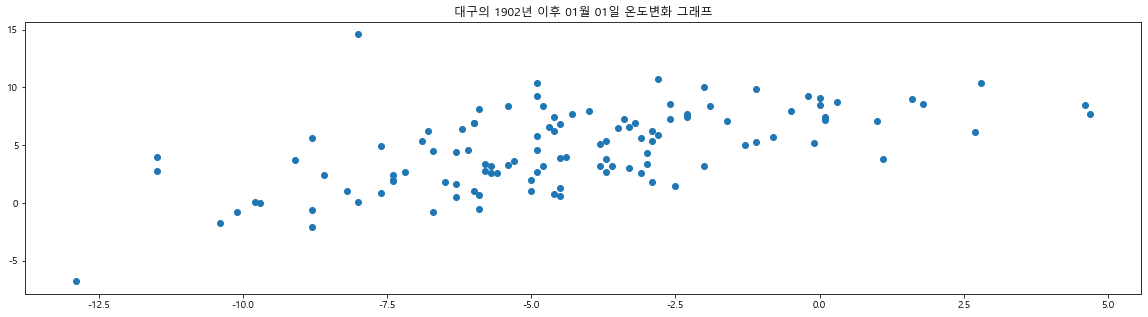

In [41]:
import matplotlib.font_manager as fm
# 2000년 이후 특정 날짜의 최고 기온 찾기    
def month_day(year, month, date):
    f = open(PATH+'daegu.csv', 'r', encoding='euc_kr')
    data = csv.reader(f)
    header = next(data)
    high_temp = []
    low_temp = []
    x_year = []

    for row in data:
        if row[-1] != '':
            date_string = row[0].split('-')
            if int(date_string[0]) >= int(year):
                if date_string[1] == month and date_string[2] == date:
                    high_temp.append(float(row[-1]))
                    low_temp.append(float(row[-2]))
                    x_year.append(date_string[0])
    f.close()
    plt.figure(figsize=(20,5))
    plt.rcParams['axes.unicode_minus'] = False
    plt.rc('font', family= 'Malgun Gothic')
    plt.scatter(low_temp, high_temp)
    plt.title(f'대구의 {year}년 이후 {month}월 {date}일 온도변화 그래프')
    plt.show()
    

year, month, date = input('연도와 월과 일을 입력하세요: ').split()

month_day(year, month, date)

In [42]:
# Pandas를 활용한 기온 데이터 #1

weather_df = pd.read_csv(PATH+ 'daegu.csv', encoding='euc-kr')
weather_df

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-01-31,143,NaN,-7.0,0.8
1,1907-02-01,143,NaN,NaN,NaN
2,1907-02-02,143,NaN,NaN,NaN
3,1907-02-03,143,NaN,NaN,NaN
4,1907-02-04,143,NaN,NaN,NaN
...,...,...,...,...,...
42150,2022-06-26,143,28.4,24.4,32.8
42151,2022-06-27,143,27.3,25.4,30.1
42152,2022-06-28,143,28.9,24.8,32.3
42153,2022-06-29,143,29.5,27.7,33.7


In [50]:
# 날짜 컬럼 str -> datetime 
weather_df.dtypes
pd.to_datetime(weather_df['날짜'],  format='%Y-%m-%d')

0       1907-01-31
1       1907-02-01
2       1907-02-02
3       1907-02-03
4       1907-02-04
           ...    
42150   2022-06-26
42151   2022-06-27
42152   2022-06-28
42153   2022-06-29
42154   2022-06-30
Name: 날짜, Length: 42155, dtype: datetime64[ns]

In [45]:
# 컬럼 이름 쉽게 처리
weather_df.columns = ['날짜', '지점', '평균기온', '최저기온', '최고기온']
weather_df

,날짜,지점,평균기온,최저기온,최고기온
0,1907-01-31,143,NaN,-7.0,0.8
1,1907-02-01,143,NaN,NaN,NaN
2,1907-02-02,143,NaN,NaN,NaN
3,1907-02-03,143,NaN,NaN,NaN
4,1907-02-04,143,NaN,NaN,NaN
...,...,...,...,...,...
42150,2022-06-26,143,28.4,24.4,32.8
42151,2022-06-27,143,27.3,25.4,30.1
42152,2022-06-28,143,28.9,24.8,32.3
42153,2022-06-29,143,29.5,27.7,33.7


In [54]:
# 누락값 개수 구하기
print(weather_df.head(5))
num_rows = weather_df.shape[0]
num_missing = num_rows- weather_df.count()
print(num_missing)

           날짜   지점  평균기온  최저기온  최고기온
0  1907-01-31  143   NaN  -7.0   0.8
1  1907-02-01  143   NaN   NaN   NaN
2  1907-02-02  143   NaN   NaN   NaN
3  1907-02-03  143   NaN   NaN   NaN
4  1907-02-04  143   NaN   NaN   NaN
날짜        0
지점        0
평균기온    703
최저기온    629
최고기온    630
dtype: int64


# 누락값(NaN) 처리
- dropna(axis)
- fillna(0)
- fillna(method='ffill')
- fillna(method='bfill')
- interpolate() : 누락값 양쪽의 값으로 중간값 계산

In [59]:
# 전처리 과정
weather_df = weather_df.dropna(axis=0)
print(weather_df.count())
print(weather_df.head(5))


날짜      41450
지점      41450
평균기온    41450
최저기온    41450
최고기온    41450
dtype: int64
             날짜   지점  평균기온  최저기온  최고기온
701  1909-01-01  143  -4.1  -8.0   0.1
702  1909-01-02  143  -0.8  -6.7   6.1
703  1909-01-03  143   1.0  -2.4   3.6
704  1909-01-04  143   4.2   0.0   9.2
705  1909-01-05  143   3.4  -0.4   9.0


In [60]:
weather_df.to_csv('daegu_utf8.csv', index=False, mode='w', encoding='utf-8')

